In [1]:
import sys

!{sys.executable} -m pip install --upgrade pip setuptools wheel
!{sys.executable} -m pip install kaggle pandas numpy scikit-learn nltk matplotlib seaborn wordcloud
!{sys.executable} -m pip install transformers==4.44.2 datasets==2.21.0 tensorflow==2.19.0 tensorflow-text==2.19.0

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------------------------------- ---- 1.6/1.8 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 7.6 MB/s  0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 7.7 MB/s  0:00:00

   ---------------------------------------- 0/3 [nltk]
   ---------------------------------------- 0/3 [nltk]
   ---------------------------------------- 0/3 [nltk]
   ---------------------------------------- 0/3 [nltk]
   ---------------------------------------- 0/3 [nltk]
   ---------------------------------------- 0/3 [nltk]
   ----------------------------

ERROR: Could not find a version that satisfies the requirement tensorflow==2.19.0 (from versions: 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.19.0


In [2]:
import os
import random
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [5]:

import sys, subprocess

def ensure_tf_keras():
    try:
        import tf_keras  # noqa: F401
        print('tf_keras already installed')
        return True
    except Exception:
        print('tf_keras not found. Attempting to install tf-keras (a Keras3 compatibility layer) ...')
        try:
            get_ipython().run_line_magic('pip', 'install tf-keras')
        except Exception:
            subprocess.run([sys.executable, '-m', 'pip', 'install', 'tf-keras'], check=False)
        print('If you prefer to use older Keras/tensorflow releases instead, consider:')
        print('pip install tensorflow==2.19.0')
        return False

ensure_tf_keras()

tf_keras not found. Attempting to install tf-keras (a Keras3 compatibility layer) ...
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 6.8 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.9 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.
If you prefer to use older Keras/tensorflow releases instead, consider:
pip install tensorflow==2.19.0
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 6.8 MB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.9 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.
If you prefer to use older Keras/tensorflow releases instead, consider:
pip install tensorf

False

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# For BERT
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
from transformers import DataCollatorWithPadding
import tensorflow.keras.backend as K

In [ ]:

import os
try:
    bert_dir = os.path.join('models', 'bert_saved')
    if os.path.isdir(bert_dir) and (os.path.exists(os.path.join(bert_dir, 'tf_model.h5')) or os.path.exists(os.path.join(bert_dir, 'config.json'))):
        print('Loading BERT tokenizer and model from local folder:', bert_dir)
        tokenizer_bert = DistilBertTokenizerFast.from_pretrained(bert_dir)
        bert_model = TFDistilBertForSequenceClassification.from_pretrained(bert_dir)
    else:
        print('Local BERT artifacts not found at', bert_dir)
        print("Falling back to 'distilbert-base-uncased' from Hugging Face (network required)")
        tokenizer_bert = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
        bert_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
    transformers_installed = True
except Exception as e:
    print('Failed to load BERT/tokenizer:', e)
    transformers_installed = False


In [7]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [8]:

import os, shutil
KAGGLE_JSON_LOCAL = r"c:\\Users\\Acer\\Documents\\GitHub\\spam-classification\\kaggle.json"
if not os.path.exists(KAGGLE_JSON_LOCAL):
    print("kaggle.json not found at:", KAGGLE_JSON_LOCAL)
    print("If you want to use Kaggle API, download your token from Kaggle -> Account -> API and save it to the path above.")
else:
    print("Found kaggle.json at:", KAGGLE_JSON_LOCAL)

Found kaggle.json at: c:\\Users\\Acer\\Documents\\GitHub\\spam-classification\\kaggle.json


In [9]:
import os, shutil
kaggle_config_dir = os.path.join(os.path.expanduser('~'), '.kaggle')
os.makedirs(kaggle_config_dir, exist_ok=True)
local_token = r"c:\\Users\\Acer\\Documents\\GitHub\\spam-classification\\kaggle.json"
if os.path.exists(local_token):
    dest = os.path.join(kaggle_config_dir, 'kaggle.json')
    shutil.copy(local_token, dest)
    try:
        os.chmod(dest, 0o600)
    except Exception:

        pass
    os.environ['KAGGLE_CONFIG_DIR'] = kaggle_config_dir
    print('Copied kaggle.json to', dest)
else:
    print('kaggle.json not found at', local_token, '; Kaggle downloads will fail until you place it there.')

Copied kaggle.json to C:\Users\Acer\.kaggle\kaggle.json


In [10]:
import os, subprocess
DATA_DIR = r"c:\\Users\\Acer\\Documents\\GitHub\\spam-classification\\data"
os.makedirs(DATA_DIR, exist_ok=True)
print('Data directory:', DATA_DIR)
datasets = ["uciml/sms-spam-collection-dataset", "wcukierski/enron-email-dataset", "ganiyuolalekan/spam-assassin-email-classification-dataset"]
def kaggle_download(dataset, dest):
    cmd = ['kaggle', 'datasets', 'download', '-d', dataset, '-p', dest, '--quiet']
    try:
        subprocess.run(cmd, check=True)
        print('Downloaded', dataset)
    except Exception as e:
        print('Failed to download', dataset, e)
for d in datasets:
    kaggle_download(d, DATA_DIR)

Data directory: c:\\Users\\Acer\\Documents\\GitHub\\spam-classification\\data
Downloaded uciml/sms-spam-collection-dataset
Downloaded uciml/sms-spam-collection-dataset
Downloaded wcukierski/enron-email-dataset
Downloaded wcukierski/enron-email-dataset
Downloaded ganiyuolalekan/spam-assassin-email-classification-dataset
Downloaded ganiyuolalekan/spam-assassin-email-classification-dataset


In [11]:

import zipfile, glob, os
for z in glob.glob(os.path.join(DATA_DIR, '*.zip')):
    try:
        base = os.path.splitext(os.path.basename(z))[0]
        extract_dir = os.path.join(DATA_DIR, base)
        os.makedirs(extract_dir, exist_ok=True)
        with zipfile.ZipFile(z, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print('Extracted', z, '->', extract_dir)
    except Exception as e:
        print('Failed to extract', z, e)

Extracted c:\\Users\\Acer\\Documents\\GitHub\\spam-classification\\data\enron-email-dataset.zip -> c:\\Users\\Acer\\Documents\\GitHub\\spam-classification\\data\enron-email-dataset
Extracted c:\\Users\\Acer\\Documents\\GitHub\\spam-classification\\data\sms-spam-collection-dataset.zip -> c:\\Users\\Acer\\Documents\\GitHub\\spam-classification\\data\sms-spam-collection-dataset
Extracted c:\\Users\\Acer\\Documents\\GitHub\\spam-classification\\data\spam-assassin-email-classification-dataset.zip -> c:\\Users\\Acer\\Documents\\GitHub\\spam-classification\\data\spam-assassin-email-classification-dataset


In [ ]:
dfs = []
import os, glob
try:
    DATA_DIR
except NameError:
    DATA_DIR = r"c:\\Users\\Acer\\Documents\\GitHub\\spam-classification\\data"
sms_path = os.path.join(DATA_DIR, 'sms-spam-collection-dataset', 'spam.csv')
if os.path.exists(sms_path):
    df_sms = pd.read_csv(sms_path, encoding='latin-1', usecols=[0,1], names=['label','message'], header=0)
    if 'v1' in df_sms.columns:
        df_sms = df_sms.rename(columns={'v1':'label','v2':'message'})
    dfs.append(df_sms[['message','label']])
else:
    print('sms dataset not found at', sms_path)

enron_path = os.path.join(DATA_DIR, 'enron-email-dataset', 'emails.csv')
if os.path.exists(enron_path):
    df_enron = pd.read_csv(enron_path, encoding='latin-1')
    if 'message' in df_enron.columns:
        text_col = 'message'
    elif 'text' in df_enron.columns:
        text_col = 'text'
    elif 'content' in df_enron.columns:
        text_col = 'content'
    else:
        text_col = df_enron.columns[0]
    if 'label' in df_enron.columns:
        df_en = df_enron[[text_col,'label']].rename(columns={text_col:'message'})
        dfs.append(df_en[['message','label']])
    else:
        possible_label_cols = [c for c in df_enron.columns if 'spam' in c.lower() or 'label' in c.lower() or 'folder' in c.lower()]
        if possible_label_cols:
            lbl = possible_label_cols[0]
            df_en = df_enron[[text_col,lbl]].rename(columns={text_col:'message', lbl:'label'})
            dfs.append(df_en[['message','label']])
        else:
            print('Enron dataset has no obvious label column; skipping auto-inclusion. If you have labeled email CSV, place it in', DATA_DIR)
else:
    print('enron dataset not found at', enron_path)

Enron dataset has no obvious label column; skipping auto-inclusion. If you have labeled email CSV, place it in c:\\Users\\Acer\\Documents\\GitHub\\spam-classification\\data


In [ ]:
import os, glob
try:
    DATA_DIR
except NameError:
    DATA_DIR = r"c:\\Users\\Acer\\Documents\\GitHub\\spam-classification\\data"
sa_csv_candidates = [
    os.path.join(DATA_DIR, 'spamassassin', 'SpamAssassin.csv'),
    os.path.join(DATA_DIR, 'spamassassin', 'spam_assassin.csv'),
    os.path.join(DATA_DIR, 'spamassassin', 'spam.csv'),
    os.path.join(DATA_DIR, 'spamassassin', 'emails.csv'),
]
found_sa = False
for p in sa_csv_candidates:
    if os.path.exists(p):
        df_sa = pd.read_csv(p, encoding='latin-1')

        if 'label' in df_sa.columns and 'message' in df_sa.columns:
            dfs.append(df_sa[['message','label']])
        elif 'text' in df_sa.columns and 'label' in df_sa.columns:
            dfs.append(df_sa[['text','label']].rename(columns={'text':'message'}))
        else:

            col_text = None
            col_label = None
            for c in df_sa.columns:
                if 'text' in c.lower() or 'message' in c.lower() or 'body' in c.lower():
                    col_text = c
                if 'spam' in c.lower() or 'label' in c.lower() or 'class' in c.lower():
                    col_label = c
            if col_text and col_label:
                df_tmp = df_sa[[col_text,col_label]].rename(columns={col_text:'message',col_label:'label'})
                dfs.append(df_tmp[['message','label']])
        found_sa = True
        break
if not found_sa:

    csvs = glob.glob(os.path.join(DATA_DIR, '*.csv'))
    if csvs:
        for f in csvs:
            try:
                df_tmp = pd.read_csv(f, encoding='latin-1')

                if 'message' in df_tmp.columns and 'label' in df_tmp.columns:
                    dfs.append(df_tmp[['message','label']])
                    found_sa = True
                    break
                else:

                    col_text = None
                    col_label = None
                    for c in df_tmp.columns:
                        if 'text' in c.lower() or 'message' in c.lower() or 'body' in c.lower():
                            col_text = c
                        if 'spam' in c.lower() or 'label' in c.lower() or 'class' in c.lower():
                            col_label = c
                    if col_text and col_label:
                        df2 = df_tmp[[col_text,col_label]].rename(columns={col_text:'message',col_label:'label'})
                        dfs.append(df2[['message','label']])
                        found_sa = True
                        break
            except Exception:
                pass
    if not found_sa:
        print('No prepackaged SpamAssassin CSV found automatically. Place labeled CSVs in', DATA_DIR, 'or adapt the paths.')

In [ ]:
if len(dfs) == 0:
    raise SystemExit("No data loaded. Please provide labeled SMS and/or Email CSVs.")

df_all = pd.concat(dfs, ignore_index=True)
print("Combined dataset shape:", df_all.shape)
df_all = df_all.dropna(subset=['message','label']).reset_index(drop=True)

def normalize_label(x):
    if isinstance(x, (int, float)):
        return 1 if int(x) == 1 else 0
    s = str(x).strip().lower()
    if s in ['spam','1','true','t','y','yes']:
        return 1
    else:
        return 0

df_all['label'] = df_all['label'].apply(normalize_label)
df_all = df_all[df_all['message'].str.strip().astype(bool)] 
print(df_all['label'].value_counts())

MAX_SAMPLES = 40000  
if len(df_all) > MAX_SAMPLES:
    # stratified sample
    df_all = df_all.groupby('label', group_keys=False).apply(lambda x: x.sample(min(len(x), MAX_SAMPLES//2), random_state=SEED)).reset_index(drop=True)
    print("Sampled dataset to", len(df_all))

Combined dataset shape: (5572, 2)
label
0    4825
1     747
Name: count, dtype: int64


In [ ]:
stop_words = set(stopwords.words('english'))
def clean_text(s):
    s = re.sub(r'\r\n', ' ', str(s))
    s = re.sub(r'\n', ' ', s)
    s = re.sub(r'<.*?>', ' ', s)   # remove html tags
    s = re.sub(r'http\S+', ' url ', s)
    s = re.sub(r'[\W_]+', ' ', s)  # keep only letters and numbers as spaces
    s = s.lower().strip()

    tokens = [tok for tok in s.split() if len(tok) > 1 and tok not in stop_words]
    return " ".join(tokens)

df_all['clean'] = df_all['message'].apply(clean_text)

In [20]:
train_df, test_df = train_test_split(df_all, test_size=0.15, stratify=df_all['label'], random_state=SEED)
train_df, val_df = train_test_split(train_df, test_size=0.15, stratify=train_df['label'], random_state=SEED)
print("Sizes -> train:", len(train_df), "val:", len(val_df), "test:", len(test_df))

Sizes -> train: 4025 val: 711 test: 836


Vocab size used for Embedding: 7130


c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 200, 128)       │       912,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 256)            │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,192,321 (4.55 MB)

 Trainable params: 1,192,321 (4.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.8516 - loss: 0.3865
Epoch 1: val_accuracy improved from None to 0.98594, saving model to lstm_best.h5

Epoch 1: val_accuracy improved from None to 0.98594, saving model to lstm_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 305ms/step - accuracy: 0.9133 - loss: 0.2430 - val_accuracy: 0.9859 - val_loss: 0.0601
Epoch 2/6
Epoch 2/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.9902 - loss: 0.0421
Epoch 2: val_accuracy improved from 0.98594 to 0.99015, saving model to lstm_best.h5

Epoch 2: val_accuracy improved from 0.98594 to 0.99015, saving model to lstm_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 374ms/step - accuracy: 0.9908 - loss: 0.0348 - val_accuracy: 0.9902 - val_loss: 0.0434
Epoch 3/6
Epoch 3/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.9957 - loss: 0.0173
Epoch 3: val_accuracy improved from 0.99015 to 0.99297, saving model to lstm_best.h5

Epoch 3: val_accuracy improved from 0.99015 to 0.99297, saving model to lstm_best.h5


63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 397ms/step - accuracy: 0.9963 - loss: 0.0146 - val_accuracy: 0.9930 - val_loss: 0.0270
Epoch 4/6
Epoch 4/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.9993 - loss: 0.0052
Epoch 4: val_accuracy did not improve from 0.99297
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 425ms/step - accuracy: 0.9995 - loss: 0.0031 - val_accuracy: 0.9930 - val_loss: 0.0427
Epoch 5/6

Epoch 4: val_accuracy did not improve from 0.99297
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 425ms/step - accuracy: 0.9995 - loss: 0.0031 - val_accuracy: 0.9930 - val_loss: 0.0427
Epoch 5/6
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.9988 - loss: 0.0062
Epoch 5: val_accuracy did not improve from 0.99297
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 429ms/step - accuracy: 0.9995 - loss: 0.0031 - val_accuracy: 0.9930 - val_loss: 0.0349
Epoch 6/6

Epoch 5: val_accuracy did not improve from 0.99297
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 429ms/step - accuracy: 0.9995 - loss: 0.0031 - val_accuracy: 0.9930 - val_loss: 0.0349
Epoc

63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 511ms/step - accuracy: 0.9998 - loss: 0.0019 - val_accuracy: 0.9944 - val_loss: 0.0378


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step
LSTM Accuracy: 0.9832535885167464
              precision    recall  f1-score   support

           0     0.9810    1.0000    0.9904       724
           1     1.0000    0.8750    0.9333       112

    accuracy                         0.9833       836
   macro avg     0.9905    0.9375    0.9619       836
weighted avg     0.9836    0.9833    0.9828       836

LSTM Accuracy: 0.9832535885167464
              precision    recall  f1-score   support

           0     0.9810    1.0000    0.9904       724
           1     1.0000    0.8750    0.9333       112

    accuracy                         0.9833       836
   macro avg     0.9905    0.9375    0.9619       836
weighted avg     0.9836    0.9833    0.9828       836



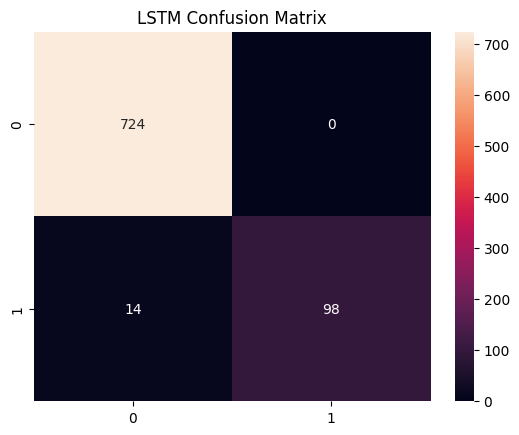

In [ ]:
MAX_VOCAB = 30000
MAX_LEN = 200 
tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['clean'].tolist())
vocab_size = min(MAX_VOCAB, len(tokenizer.word_index) + 1)
print('Vocab size used for Embedding:', vocab_size)

def prepare_seq(texts):
    seq = tokenizer.texts_to_sequences(texts)
    return pad_sequences(seq, maxlen=MAX_LEN, padding='post', truncating='post')

X_train_seq = prepare_seq(train_df['clean'])
X_val_seq = prepare_seq(val_df['clean'])
X_test_seq = prepare_seq(test_df['clean'])
y_train = train_df['label'].values
y_val = val_df['label'].values
y_test = test_df['label'].values

# Build LSTM model
EMBED_DIM = 128
lstm_model = Sequential([

    Embedding(input_dim=vocab_size, output_dim=EMBED_DIM, input_length=MAX_LEN),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.build((None, MAX_LEN))
lstm_model.summary()

lstm_ckpt = ModelCheckpoint('lstm_best.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
lstm_es = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, mode='max')


EPOCHS = 6
BATCH = 64
history = lstm_model.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=EPOCHS, batch_size=BATCH,
    callbacks=[lstm_ckpt, lstm_es]
)

# Evaluate LSTM
lstm_preds_prob = lstm_model.predict(X_test_seq, batch_size=128)
lstm_preds = (lstm_preds_prob.flatten() >= 0.5).astype(int)
print("LSTM Accuracy:", accuracy_score(y_test, lstm_preds))
print(classification_report(y_test, lstm_preds, digits=4))
sns.heatmap(confusion_matrix(y_test, lstm_preds), annot=True, fmt='d')
plt.title("LSTM Confusion Matrix"); plt.show()

In [29]:

import tensorflow as tf
import numpy as np

print('--- BERT diagnostics starting ---')

# Check presence
print('bert_model in globals?:', 'bert_model' in globals())
if 'bert_model' in globals():
    m = bert_model
    try:
        print('optimizer:', getattr(m, 'optimizer', None))
        print('has compiled_loss attribute:', hasattr(m, 'compiled_loss'))
        try:
            print('compiled_loss is None?:', m.compiled_loss is None)
        except Exception:
            pass
        print('run_eagerly:', getattr(m, 'run_eagerly', None))
    except Exception as e:
        print('Could not introspect bert_model compile state:', e)
else:
    print('bert_model not found — ensure BERT model creation cell was run')

# Dataset inspection helpers
def _inspect_ds(ds, name='dataset'):
    try:
        print(f"{name} element_spec: ", getattr(ds, 'element_spec', None))
        for batch in ds.take(1):
            x, y = batch
            if isinstance(x, dict):
                print(f"{name} batch x keys:", list(x.keys()))
                for k, v in x.items():
                    try:
                        print(f"  {k}: shape={getattr(v, 'shape', None)}, dtype={getattr(v, 'dtype', None)}")
                    except Exception:
                        pass
            else:
                print(f"{name} batch x type:", type(x))
            try:
                print(f"{name} y shape/dtype:", getattr(y, 'shape', None), getattr(y, 'dtype', None))
            except Exception:
                pass
            break
    except Exception as e:
        print(f"Failed to inspect {name}:", e)

# Only inspect if datasets exist
if 'train_dataset' in globals():
    _inspect_ds(train_dataset, 'train_dataset')
if 'val_dataset' in globals():
    _inspect_ds(val_dataset, 'val_dataset')
if 'test_dataset' in globals():
    _inspect_ds(test_dataset, 'test_dataset')

# Ensure labels are int32 — cast datasets in-place if needed
try:
    sample_dtype = None
    if 'train_dataset' in globals():
        for _, yb in train_dataset.take(1):
            sample_dtype = getattr(yb, 'dtype', None)
            break
    if sample_dtype is not None and sample_dtype != tf.int32:
        print('Casting label tensors to tf.int32 and rebuilding datasets...')
        train_dataset = train_dataset.map(lambda x, y: (x, tf.cast(y, tf.int32))).prefetch(tf.data.AUTOTUNE)
        val_dataset = val_dataset.map(lambda x, y: (x, tf.cast(y, tf.int32))).prefetch(tf.data.AUTOTUNE)
        test_dataset = test_dataset.map(lambda x, y: (x, tf.cast(y, tf.int32))).prefetch(tf.data.AUTOTUNE)
        print('Rebuilt datasets with int32 labels')
    else:
        print('Label dtype is already tf.int32 or sample not available:', sample_dtype)
except Exception as e:
    print('Label dtype check/cast failed:', e)

# Try a single forward pass through the bert_model if available
if 'bert_model' in globals() and 'train_dataset' in globals():
    try:
        for batch in train_dataset.take(1):
            x_batch, y_batch = batch
            out = bert_model(x_batch, training=False)
            try:
                logits = out.logits
                print('Forward pass logits shape/dtype:', getattr(logits, 'shape', None), getattr(logits, 'dtype', None))
            except Exception:
                print('Forward pass returned:', type(out))
            break
    except Exception as e:
        print('Forward pass failed:', repr(e))

print('--- BERT diagnostics finished ---')


--- BERT diagnostics starting ---
bert_model in globals?: True
optimizer: None
has compiled_loss attribute: True
compiled_loss is None?: True
run_eagerly: False
train_dataset element_spec:  ({'input_ids': TensorSpec(shape=(None, 86), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 86), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))
train_dataset batch x keys: ['input_ids', 'attention_mask']
  input_ids: shape=(16, 86), dtype=<dtype: 'int32'>
  attention_mask: shape=(16, 86), dtype=<dtype: 'int32'>
train_dataset y shape/dtype: (16,) <dtype: 'int64'>
val_dataset element_spec:  ({'input_ids': TensorSpec(shape=(None, 92), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 92), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))
val_dataset batch x keys: ['input_ids', 'attention_mask']
  input_ids: shape=(16, 92), dtype=<dtype: 'int32'>
  attention_mask: shape=(16, 92), dtype=<dtype: 

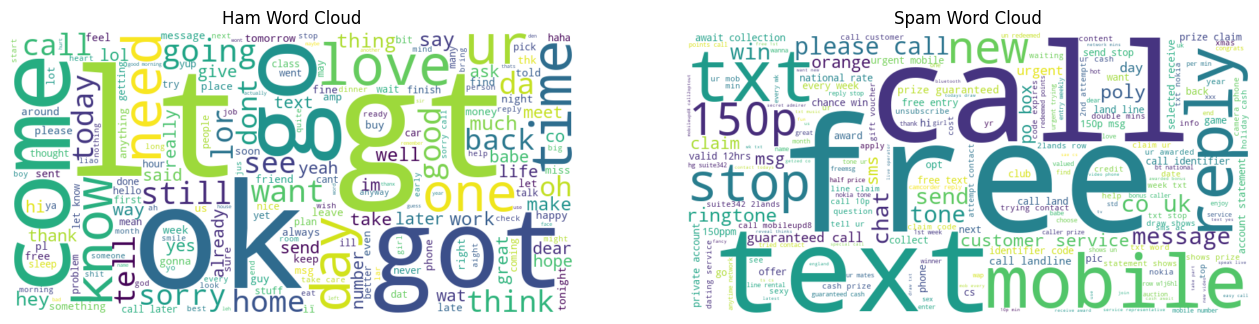

In [ ]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


try:
    texts_ham = ' '.join(df_all[df_all['label']==0]['clean'].astype(str).tolist())
    texts_spam = ' '.join(df_all[df_all['label']==1]['clean'].astype(str).tolist())
except Exception:
    texts_ham = ' '.join(df_all[df_all['label']==0]['message'].astype(str).tolist())
    texts_spam = ' '.join(df_all[df_all['label']==1]['message'].astype(str).tolist())

wc_ham = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(texts_ham if texts_ham.strip() else 'no_text')
wc_spam = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(texts_spam if texts_spam.strip() else 'no_text')

fig, axes = plt.subplots(1,2, figsize=(16,6))
axes[0].imshow(wc_ham, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Ham Word Cloud')
axes[1].imshow(wc_spam, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Spam Word Cloud')
plt.show()

LSTM Classification Report:
              precision    recall  f1-score   support

           0     0.9810    1.0000    0.9904       724
           1     1.0000    0.8750    0.9333       112

    accuracy                         0.9833       836
   macro avg     0.9905    0.9375    0.9619       836
weighted avg     0.9836    0.9833    0.9828       836



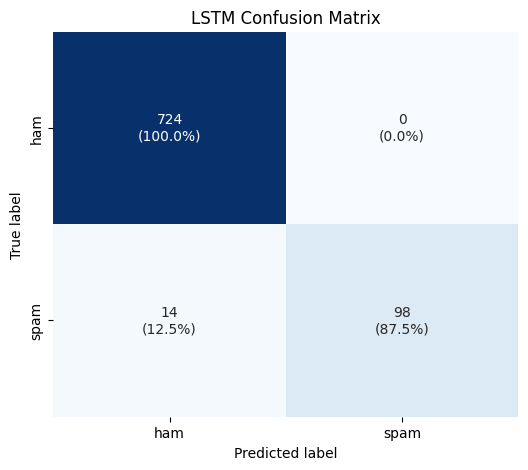

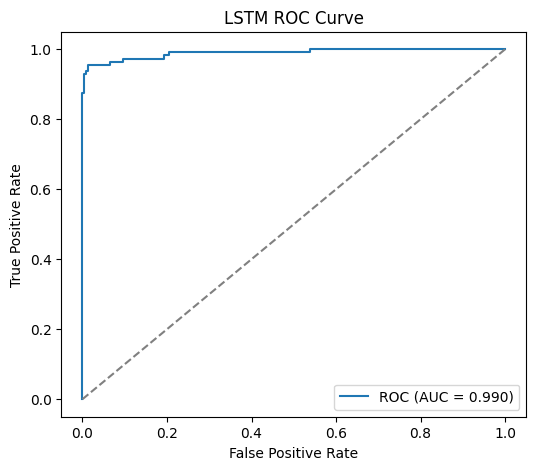

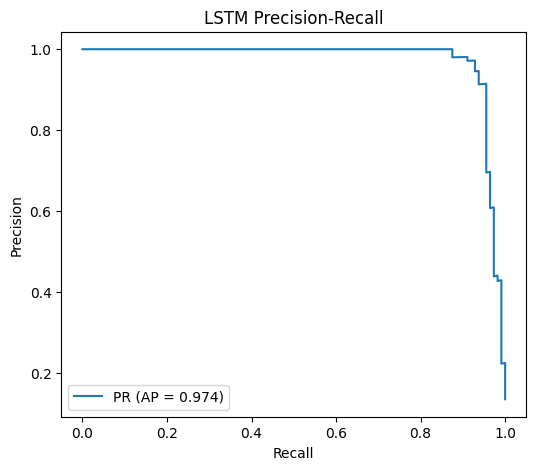

BERT logits/probabilities not available — ensure the BERT evaluation cell was run.


In [ ]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
import tensorflow as tf

def plot_confusion(y_true, y_pred, labels=[0,1], title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = cm.sum(axis=1, keepdims=True)
    cm_percent = (cm / cm_sum.astype(float)) * 100
    annot = np.empty_like(cm).astype(object)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            annot[i,j] = f"{cm[i,j]}\n({cm_percent[i,j]:.1f}%)"
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', cbar=False, xticklabels=['ham','spam'], yticklabels=['ham','spam'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.show()

# LSTM evaluation (needs probabilities)
print('LSTM Classification Report:')
try:
    lstm_probs = lstm_preds_prob.flatten()
    lstm_preds_local = (lstm_probs >= 0.5).astype(int)
    print(classification_report(y_test, lstm_preds_local, digits=4))
    plot_confusion(y_test, lstm_preds_local, title='LSTM Confusion Matrix')

    fpr, tpr, _ = roc_curve(y_test, lstm_probs)
    roc_auc = auc(fpr, tpr)
    precision, recall, _ = precision_recall_curve(y_test, lstm_probs)
    ap = average_precision_score(y_test, lstm_probs)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})')
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('LSTM ROC Curve')
    plt.legend()
    plt.show()
    plt.figure(figsize=(6,5))
    plt.plot(recall, precision, label=f'PR (AP = {ap:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('LSTM Precision-Recall')
    plt.legend()
    plt.show()
except NameError:
    print('LSTM prediction probabilities not available — ensure the LSTM evaluation cell was run.')


try:
    bert_logits = bert_preds_logits
    # convert logits to probs
    bert_probs_all = tf.nn.softmax(bert_logits, axis=1).numpy()
    bert_probs = bert_probs_all[:,1]  # probability for class 1 (spam)
    bert_preds_local = (bert_probs >= 0.5).astype(int)
    print('BERT Classification Report:')
    print(classification_report(y_test, bert_preds_local, digits=4))
    plot_confusion(y_test, bert_preds_local, title='BERT Confusion Matrix')
    fpr_b, tpr_b, _ = roc_curve(y_test, bert_probs)
    roc_auc_b = auc(fpr_b, tpr_b)
    precision_b, recall_b, _ = precision_recall_curve(y_test, bert_probs)
    ap_b = average_precision_score(y_test, bert_probs)
    plt.figure(figsize=(6,5))
    plt.plot(fpr_b, tpr_b, label=f'ROC (AUC = {roc_auc_b:.3f})')
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('BERT ROC Curve')
    plt.legend()
    plt.show()
    plt.figure(figsize=(6,5))
    plt.plot(recall_b, precision_b, label=f'PR (AP = {ap_b:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('BERT Precision-Recall')
    plt.legend()
    plt.show()
except NameError:
    print('BERT logits/probabilities not available — ensure the BERT evaluation cell was run.')

In [ ]:
def predict_lstm(text):
    cleaned = clean_text(text)
    seq = prepare_seq([cleaned])
    prob = lstm_model.predict(seq)[0][0]
    return {'label': int(prob>=0.5), 'probability': float(prob)}

def predict_bert(text):
    cleaned = clean_text(text)
    enc = tokenizer_bert([cleaned], truncation=True, padding=True, max_length=256, return_tensors='tf')
    logits = bert_model(enc).logits.numpy()
    probs = tf.nn.softmax(logits, axis=1).numpy()[0]
    pred = int(np.argmax(probs))
    return {'label': pred, 'probability': float(probs[pred])}


samples = [
    "Congratulations! You have won a lottery. Click the link to claim now.",
    "Hi team, please find the meeting agenda attached for tomorrow's sync.",
    "URGENT: Your account has been compromised. Verify immediately!"
]
for s in samples:
    print("\nMessage:", s)
    print("LSTM:", predict_lstm(s))
    print("BERT:", predict_bert(s))


Message: Congratulations! You have won a lottery. Click the link to claim now.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
LSTM: {'label': 1, 'probability': 0.8910799026489258}
LSTM: {'label': 1, 'probability': 0.8910799026489258}
BERT: {'label': 0, 'probability': 0.5408933162689209}

Message: Hi team, please find the meeting agenda attached for tomorrow's sync.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
BERT: {'label': 0, 'probability': 0.5408933162689209}

Message: Hi team, please find the meeting agenda attached for tomorrow's sync.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
LSTM: {'label': 0, 'probability': 0.0070462217554450035}
BERT: {'label': 0, 'probability': 0.5438430905342102}

Message: URGENT: Your account has been compromised. Verify immediately!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/stepLSTM: {'label': 0, 'probability': 0.0070462217554450035}
BERT: {'label': 0, 'probability': 0.5438430905342102}

Message: URGENT: Your account has been compromised. Verify 

In [36]:
import os, json
models_dir = 'models'
os.makedirs(models_dir, exist_ok=True)

try:
    tokenizer_json = tokenizer.to_json()
    with open(os.path.join(models_dir, 'lstm_tokenizer.json'),'w', encoding='utf-8') as f:
        f.write(tokenizer_json)
    print('Saved LSTM tokenizer ->', os.path.join(models_dir, 'lstm_tokenizer.json'))
except Exception as e:
    print('Failed to save tokenizer:', e)

try:
    lstm_saved_dir = os.path.join(models_dir, 'lstm_full_model')
    lstm_h5 = os.path.join(models_dir, 'lstm_model.h5')
    lstm_weights = os.path.join(models_dir, 'lstm_weights.h5')
    lstm_model.save(lstm_saved_dir)  
    try:
        lstm_model.save(lstm_h5)
    except Exception:
        print('Could not save full model to HDF5, saving weights only')
    lstm_model.save_weights(lstm_weights)
    print('Saved LSTM model ->', lstm_saved_dir, 'and weights ->', lstm_weights)
except NameError:
    print('lstm_model not found; did you run the training cell?')
except Exception as e:
    print('Error saving LSTM model:', e)

try:
    if 'history' in globals() and hasattr(history, 'history'):
        import pandas as pd
        hist_df = pd.DataFrame(history.history)
        hist_csv = os.path.join(models_dir, 'lstm_history.csv')
        hist_df.to_csv(hist_csv, index=False)
        print('Saved training history ->', hist_csv)
except Exception as e:
    print('Failed to save training history:', e)

try:
    bert_dir = os.path.join(models_dir, 'bert_saved')
    bert_model.save_pretrained(bert_dir)
    tokenizer_bert.save_pretrained(bert_dir)
    print('Saved BERT model and tokenizer ->', bert_dir)
except NameError:
    print('BERT model/tokenizer not found; did you run the BERT cells?')
except Exception as e:
    print('Error saving BERT artifacts:', e)

print('All save attempts finished. Check the', models_dir, 'directory.')

Saved LSTM tokenizer -> models\lstm_tokenizer.json
Error saving LSTM model: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=models\lstm_full_model.
Saved training history -> models\lstm_history.csv
Saved BERT model and tokenizer -> models\bert_saved
All save attempts finished. Check the models directory.
Saved BERT model and tokenizer -> models\bert_saved
All save attempts finished. Check the models directory.
